In [1]:
# EDA Overview: Mitsui Commodity Prediction

# This notebook loads training data, joins on date_id, checks missingness and target coverage,
# and verifies target_pairs consistency with basic sanity checks.

import os
import pandas as pd
import numpy as np
from pathlib import Path

PROJECT_ROOT = Path('/Users/fw1230/Documents/Projects/mitsui-commodity-prediction')
DATA_RAW = PROJECT_ROOT / 'data' / 'raw'

TRAIN_FEATURES_PATH = DATA_RAW / 'train.csv'
TRAIN_LABELS_PATH = DATA_RAW / 'train_labels.csv'
TEST_PATH = DATA_RAW / 'test.csv'
TARGET_PAIRS_PATH = DATA_RAW / 'target_pairs.csv'

print(TRAIN_FEATURES_PATH)
print(TRAIN_LABELS_PATH)
print(TEST_PATH)
print(TARGET_PAIRS_PATH)

assert TRAIN_FEATURES_PATH.exists(), 'train.csv missing'
assert TRAIN_LABELS_PATH.exists(), 'train_labels.csv missing'
assert TEST_PATH.exists(), 'test.csv missing'
assert TARGET_PAIRS_PATH.exists(), 'target_pairs.csv missing'


/Users/fw1230/Documents/Projects/mitsui-commodity-prediction/data/raw/train.csv
/Users/fw1230/Documents/Projects/mitsui-commodity-prediction/data/raw/train_labels.csv
/Users/fw1230/Documents/Projects/mitsui-commodity-prediction/data/raw/test.csv
/Users/fw1230/Documents/Projects/mitsui-commodity-prediction/data/raw/target_pairs.csv


In [2]:
# Load data
pd.set_option('display.max_columns', 200)

features = pd.read_csv(TRAIN_FEATURES_PATH, low_memory=False)
labels = pd.read_csv(TRAIN_LABELS_PATH, low_memory=False)
test = pd.read_csv(TEST_PATH, low_memory=False)
target_pairs = pd.read_csv(TARGET_PAIRS_PATH)

print('features shape:', features.shape)
print('labels shape:', labels.shape)
print('test shape:', test.shape)
print('target_pairs shape:', target_pairs.shape)

print('features date_id range:', int(features['date_id'].min()), '->', int(features['date_id'].max()))
print('labels date_id range:', int(labels['date_id'].min()), '->', int(labels['date_id'].max()))
print('test date_id range   :', int(test['date_id'].min()), '->', int(test['date_id'].max()))

features.head(3)


features shape: (1917, 558)
labels shape: (1917, 425)
test shape: (90, 559)
target_pairs shape: (424, 3)
features date_id range: 0 -> 1916
labels date_id range: 0 -> 1916
test date_id range   : 1827 -> 1916


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,JPX_RSS3_Rubber_Futures_Open,JPX_Gold_Mini_Futures_High,JPX_Gold_Rolling-Spot_Futures_High,JPX_Gold_Standard_Futures_High,JPX_Platinum_Mini_Futures_High,JPX_Platinum_Standard_Futures_High,JPX_RSS3_Rubber_Futures_High,JPX_Gold_Mini_Futures_Low,JPX_Gold_Rolling-Spot_Futures_Low,JPX_Gold_Standard_Futures_Low,JPX_Platinum_Mini_Futures_Low,JPX_Platinum_Standard_Futures_Low,JPX_RSS3_Rubber_Futures_Low,JPX_Gold_Mini_Futures_Close,JPX_Gold_Rolling-Spot_Futures_Close,JPX_Gold_Standard_Futures_Close,JPX_Platinum_Mini_Futures_Close,JPX_Platinum_Standard_Futures_Close,JPX_RSS3_Rubber_Futures_Close,JPX_Gold_Mini_Futures_Volume,JPX_Gold_Rolling-Spot_Futures_Volume,JPX_Gold_Standard_Futures_Volume,JPX_Platinum_Mini_Futures_Volume,JPX_Platinum_Standard_Futures_Volume,JPX_RSS3_Rubber_Futures_Volume,JPX_Gold_Mini_Futures_settlement_price,JPX_Gold_Rolling-Spot_Futures_settlement_price,JPX_Platinum_Mini_Futures_settlement_price,JPX_RSS3_Rubber_Futures_settlement_price,JPX_Gold_Mini_Futures_open_interest,JPX_Gold_Rolling-Spot_Futures_open_interest,JPX_Gold_Standard_Futures_open_interest,JPX_Platinum_Mini_Futures_open_interest,JPX_Platinum_Standard_Futures_open_interest,JPX_RSS3_Rubber_Futures_open_interest,US_Stock_ACWI_adj_open,US_Stock_AEM_adj_open,US_Stock_AG_adj_open,US_Stock_AGG_adj_open,US_Stock_ALB_adj_open,US_Stock_AMP_adj_open,US_Stock_BCS_adj_open,US_Stock_BKR_adj_open,US_Stock_BND_adj_open,US_Stock_BNDX_adj_open,US_Stock_BP_adj_open,US_Stock_BSV_adj_open,US_Stock_CAT_adj_open,US_Stock_CCJ_adj_open,US_Stock_CLF_adj_open,US_Stock_COP_adj_open,US_Stock_CVE_adj_open,US_Stock_CVX_adj_open,US_Stock_DE_adj_open,US_Stock_DVN_adj_open,US_Stock_EEM_adj_open,US_Stock_EFA_adj_open,US_Stock_EMB_adj_open,US_Stock_ENB_adj_open,US_Stock_EOG_adj_open,US_Stock_EWJ_adj_open,US_Stock_EWT_adj_open,US_Stock_EWY_adj_open,US_Stock_EWZ_adj_open,US_Stock_FCX_adj_open,US_Stock_FNV_adj_open,US_Stock_FXI_adj_open,US_Stock_GDX_adj_open,US_Stock_GDXJ_adj_open,US_Stock_GLD_adj_open,US_Stock_GOLD_adj_open,US_Stock_HAL_adj_open,US_Stock_HES_adj_open,US_Stock_HL_adj_open,US_Stock_IAU_adj_open,US_Stock_IEF_adj_open,US_Stock_IEMG_adj_open,US_Stock_IGSB_adj_open,US_Stock_JNK_adj_open,US_Stock_KGC_adj_open,US_Stock_KMI_adj_open,US_Stock_LQD_adj_open,US_Stock_LYB_adj_open,US_Stock_MBB_adj_open,US_Stock_MPC_adj_open,US_Stock_MS_adj_open,US_Stock_NEM_adj_open,US_Stock_NUE_adj_open,US_Stock_NUGT_adj_open,US_Stock_OIH_adj_open,...,US_Stock_GDXJ_adj_volume,US_Stock_GLD_adj_volume,US_Stock_GOLD_adj_volume,US_Stock_HAL_adj_volume,US_Stock_HES_adj_volume,US_Stock_HL_adj_volume,US_Stock_IAU_adj_volume,US_Stock_IEF_adj_volume,US_Stock_IEMG_adj_volume,US_Stock_IGSB_adj_volume,US_Stock_JNK_adj_volume,US_Stock_KGC_adj_volume,US_Stock_KMI_adj_volume,US_Stock_LQD_adj_volume,US_Stock_LYB_adj_volume,US_Stock_MBB_adj_volume,US_Stock_MPC_adj_volume,US_Stock_MS_adj_volume,US_Stock_NEM_adj_volume,US_Stock_NUE_adj_volume,US_Stock_NUGT_adj_volume,US_Stock_OIH_adj_volume,US_Stock_OKE_adj_volume,US_Stock_OXY_adj_volume,US_Stock_PAAS_adj_volume,US_Stock_RIO_adj_volume,US_Stock_RSP_adj_volume,US_Stock_RY_adj_volume,US_Stock_SCCO_adj_volume,US_Stock_SHEL_adj_volume,US_Stock_SHY_adj_volume,US_Stock_SLB_adj_volume,US_Stock_SLV_adj_volume,US_Stock_SPIB_adj_volume,US_Stock_SPTL_adj_volume,US_Stock_SPYV_adj_volume,US_Stock_STLD_adj_volume,US_Stock_TD_adj_volume,US_Stock_TECK_adj_volume,US_Stock_TIP_adj_volume,US_Stock_TRGP_adj_volume,US_Stock_URA_adj_volume,US_Stock_VALE_adj_volume,US_Stock_VCIT_adj_volume,US_Stock_VCSH_adj_volume,US_Stock_VEA_adj_volume,US_Stock_VGIT_adj_volume,US_Stock_VGK_adj_volume,US_Stock_VGLT_adj_volume,US_Stock_VGSH_adj_volume,US_Stock_VT_adj_volume,US_Stock_VTV_adj_volume,US_Stock_VWO_adj_volume,US_Stock_VXUS_adj_volume,US_Stock_VYM_adj_volume,US_Stock_WMB_adj_volume

In [4]:
# Join features and labels on date_id
merged = features.merge(labels, on='date_id', how='left', validate='one_to_one')
print('merged shape:', merged.shape)

# Identify feature and target columns
feature_cols = [c for c in features.columns if c != 'date_id']
target_cols = [c for c in labels.columns if c != 'date_id']

print('num features:', len(feature_cols))
print('num targets :', len(target_cols))

merged.head(3)


merged shape: (1917, 982)
num features: 557
num targets : 424


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,JPX_RSS3_Rubber_Futures_Open,JPX_Gold_Mini_Futures_High,JPX_Gold_Rolling-Spot_Futures_High,JPX_Gold_Standard_Futures_High,JPX_Platinum_Mini_Futures_High,JPX_Platinum_Standard_Futures_High,JPX_RSS3_Rubber_Futures_High,JPX_Gold_Mini_Futures_Low,JPX_Gold_Rolling-Spot_Futures_Low,JPX_Gold_Standard_Futures_Low,JPX_Platinum_Mini_Futures_Low,JPX_Platinum_Standard_Futures_Low,JPX_RSS3_Rubber_Futures_Low,JPX_Gold_Mini_Futures_Close,JPX_Gold_Rolling-Spot_Futures_Close,JPX_Gold_Standard_Futures_Close,JPX_Platinum_Mini_Futures_Close,JPX_Platinum_Standard_Futures_Close,JPX_RSS3_Rubber_Futures_Close,JPX_Gold_Mini_Futures_Volume,JPX_Gold_Rolling-Spot_Futures_Volume,JPX_Gold_Standard_Futures_Volume,JPX_Platinum_Mini_Futures_Volume,JPX_Platinum_Standard_Futures_Volume,JPX_RSS3_Rubber_Futures_Volume,JPX_Gold_Mini_Futures_settlement_price,JPX_Gold_Rolling-Spot_Futures_settlement_price,JPX_Platinum_Mini_Futures_settlement_price,JPX_RSS3_Rubber_Futures_settlement_price,JPX_Gold_Mini_Futures_open_interest,JPX_Gold_Rolling-Spot_Futures_open_interest,JPX_Gold_Standard_Futures_open_interest,JPX_Platinum_Mini_Futures_open_interest,JPX_Platinum_Standard_Futures_open_interest,JPX_RSS3_Rubber_Futures_open_interest,US_Stock_ACWI_adj_open,US_Stock_AEM_adj_open,US_Stock_AG_adj_open,US_Stock_AGG_adj_open,US_Stock_ALB_adj_open,US_Stock_AMP_adj_open,US_Stock_BCS_adj_open,US_Stock_BKR_adj_open,US_Stock_BND_adj_open,US_Stock_BNDX_adj_open,US_Stock_BP_adj_open,US_Stock_BSV_adj_open,US_Stock_CAT_adj_open,US_Stock_CCJ_adj_open,US_Stock_CLF_adj_open,US_Stock_COP_adj_open,US_Stock_CVE_adj_open,US_Stock_CVX_adj_open,US_Stock_DE_adj_open,US_Stock_DVN_adj_open,US_Stock_EEM_adj_open,US_Stock_EFA_adj_open,US_Stock_EMB_adj_open,US_Stock_ENB_adj_open,US_Stock_EOG_adj_open,US_Stock_EWJ_adj_open,US_Stock_EWT_adj_open,US_Stock_EWY_adj_open,US_Stock_EWZ_adj_open,US_Stock_FCX_adj_open,US_Stock_FNV_adj_open,US_Stock_FXI_adj_open,US_Stock_GDX_adj_open,US_Stock_GDXJ_adj_open,US_Stock_GLD_adj_open,US_Stock_GOLD_adj_open,US_Stock_HAL_adj_open,US_Stock_HES_adj_open,US_Stock_HL_adj_open,US_Stock_IAU_adj_open,US_Stock_IEF_adj_open,US_Stock_IEMG_adj_open,US_Stock_IGSB_adj_open,US_Stock_JNK_adj_open,US_Stock_KGC_adj_open,US_Stock_KMI_adj_open,US_Stock_LQD_adj_open,US_Stock_LYB_adj_open,US_Stock_MBB_adj_open,US_Stock_MPC_adj_open,US_Stock_MS_adj_open,US_Stock_NEM_adj_open,US_Stock_NUE_adj_open,US_Stock_NUGT_adj_open,US_Stock_OIH_adj_open,...,target_324,target_325,target_326,target_327,target_328,target_329,target_330,target_331,target_332,target_333,target_334,target_335,target_336,target_337,target_338,target_339,target_340,target_341,target_342,target_343,target_344,target_345,target_346,target_347,target_348,target_349,target_350,target_351,target_352,target_353,target_354,target_355,target_356,target_357,target_358,target_359,target_360,target_361,target_362,target_363,target_364,target_365,target_366,target_367,target_368,target_369,target_370,target_371,target_372,target_373,target_374,target_375,target_376,target_377,target_378,target_379,target_380,target_381,target_382,target_383,target_384,target_385,target_386,target_387,target_388,target_389,target_390,target_391,target_392,target_393,target_394,target_395,target_396,target_397,target_398,target_399,target_400,target_401,target_402,target_403,target_404,target_405,target_406,target_407,target_408,target_409,target_410,target_411,target_412,target_413,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.4457,39.6837,6.7563,89.5868,117.2076,147.0081,8.1897,25.5772,66.

In [5]:
# Missingness summary
missing_feat_pct = features[feature_cols].isna().mean().sort_values(ascending=False)
missing_tgt_pct = labels[target_cols].isna().mean().sort_values(ascending=False)

print('Top 20 missing features:')
display(missing_feat_pct.head(20))
print('\nTop 20 missing targets:')
display(missing_tgt_pct.head(20))

# Coverage of targets (non-null counts)
coverage = labels[target_cols].notna().sum().sort_values(ascending=False)
print('\nTarget coverage (non-null counts) - top 20:')
display(coverage.head(20))


Top 20 missing features:


US_Stock_GOLD_adj_low                             0.870631
US_Stock_GOLD_adj_volume                          0.870631
US_Stock_GOLD_adj_open                            0.870631
US_Stock_GOLD_adj_high                            0.870631
US_Stock_GOLD_adj_close                           0.870631
JPX_Gold_Rolling-Spot_Futures_Open                0.059990
JPX_Platinum_Mini_Futures_Close                   0.059990
JPX_RSS3_Rubber_Futures_Close                     0.059990
JPX_Gold_Mini_Futures_Volume                      0.059990
JPX_Gold_Rolling-Spot_Futures_Volume              0.059990
JPX_Gold_Standard_Futures_Volume                  0.059990
JPX_Platinum_Mini_Futures_Volume                  0.059990
JPX_Platinum_Standard_Futures_Volume              0.059990
JPX_RSS3_Rubber_Futures_Volume                    0.059990
JPX_Gold_Mini_Futures_settlement_price            0.059990
JPX_Gold_Rolling-Spot_Futures_settlement_price    0.059990
JPX_RSS3_Rubber_Futures_settlement_price          0.0599


Top 20 missing targets:


target_232    0.179447
target_235    0.179447
target_290    0.179447
target_302    0.179447
target_303    0.179447
target_288    0.179447
target_286    0.179447
target_285    0.179447
target_276    0.179447
target_270    0.179447
target_269    0.179447
target_317    0.179447
target_262    0.179447
target_261    0.179447
target_225    0.179447
target_256    0.179447
target_247    0.179447
target_238    0.179447
target_252    0.179447
target_185    0.177360
dtype: float64


Target coverage (non-null counts) - top 20:


target_212    1917
target_318    1917
target_74     1831
target_20     1831
target_84     1831
target_23     1831
target_26     1831
target_29     1831
target_76     1831
target_36     1831
target_18     1831
target_39     1831
target_43     1831
target_69     1831
target_45     1831
target_64     1831
target_60     1831
target_86     1831
target_56     1831
target_87     1831
dtype: int64

In [16]:
# Corrected target_pairs consistency check - forward-looking log returns
pairs = target_pairs.copy()
pairs = pairs[pairs['target'].str.startswith('target_')].reset_index(drop=True)

# Parse pair string
pairs['symbol_a'] = pairs['pair'].str.split('-').str[0].str.strip()
pairs['symbol_b'] = pairs['pair'].where(~pairs['pair'].str.contains('-'), 
                                       pairs['pair'].str.split('-').str[1]).str.strip()

# Sample for faster computation
sample_pairs = pairs.sample(min(15, len(pairs)), random_state=42)

results = []
for _, row in sample_pairs.iterrows():
    tcol = row['target']
    lag = int(row['lag']) if not pd.isna(row['lag']) else 1
    a = row['symbol_a']
    b = row['symbol_b'] if isinstance(row['symbol_b'], str) else None
    
    if a not in features.columns:
        continue
        
    # Compute the target according to the actual generation code
    tmp = features[['date_id', a]].copy()
    
    if b and b in features.columns:
        # Case 2: Difference of log returns for pairs
        # log(price_A_{t+lag+1} / price_A_{t+1}) - log(price_B_{t+lag+1} / price_B_{t+1})
        tmp['a_return'] = np.log(features[a].shift(-(lag+1)) / features[a].shift(-1))
        tmp['b_return'] = np.log(features[b].shift(-(lag+1)) / features[b].shift(-1))
        tmp['computed_target'] = tmp['a_return'] - tmp['b_return']
    else:
        # Case 1: Log return for single instrument
        # log(price_{t+lag+1} / price_{t+1})
        tmp['computed_target'] = np.log(features[a].shift(-(lag+1)) / features[a].shift(-1))
    
    # Merge with actual target
    tmp = tmp.merge(labels[['date_id', tcol]], on='date_id', how='inner')
    tmp = tmp.sort_values('date_id')
    
    # Compute correlation
    corr = tmp[['computed_target', tcol]].dropna().corr().iloc[0,1]
    n_samples = tmp[['computed_target', tcol]].dropna().shape[0]
    
    results.append({
        'target': tcol, 
        'lag': lag, 
        'symbol_a': a, 
        'symbol_b': b, 
        'type': 'pair_returns' if b else 'single_return',
        'n': n_samples, 
        'corr': corr
    })

pd.DataFrame(results).sort_values('corr', ascending=False)

,target,lag,symbol_a,symbol_b,type,n,corr
1,target_280,3,JPX_Gold_Standard_Futures_Close,FX_EURCAD,pair_returns,1695,1.0
0,target_145,2,FX_ZARCHF,JPX_Gold_Standard_Futures_Close,pair_returns,1698,1.0
2,target_175,2,JPX_Platinum_Standard_Futures_Close,US_Stock_ACWI_adj_close,pair_returns,1576,1.0
3,target_373,4,US_Stock_SLB_adj_close,LME_CA_Close,pair_returns,1725,1.0
4,target_420,4,JPX_Gold_Standard_Futures_Close,US_Stock_RY_adj_close,pair_returns,1576,1.0
8,target_30,1,LME_ZS_Close,US_Stock_CCJ_adj_close,pair_returns,1744,1.0
9,target_72,1,LME_AH_Close,US_Stock_TD_adj_close,pair_returns,1744,1.0
13,target_90,1,US_Stock_LYB_adj_close,LME_AH_Close,pair_returns,1744,1.0
6,target_132,2,US_Stock_EWZ_adj_close,LME_ZS_Close,pair_returns,1727,1.0
10,target_70,1,FX_USDCHF,JPX_Gold_Standard_Futures_Close,pair_returns,1710,1.0


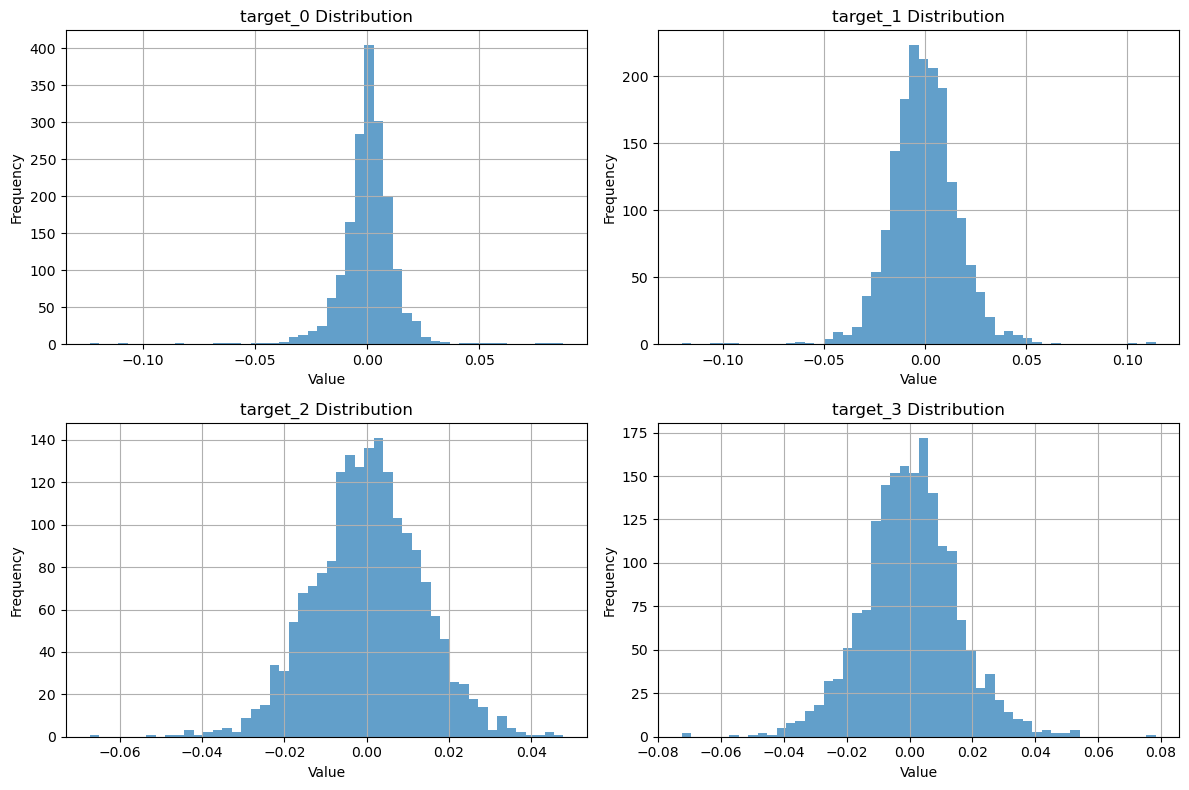

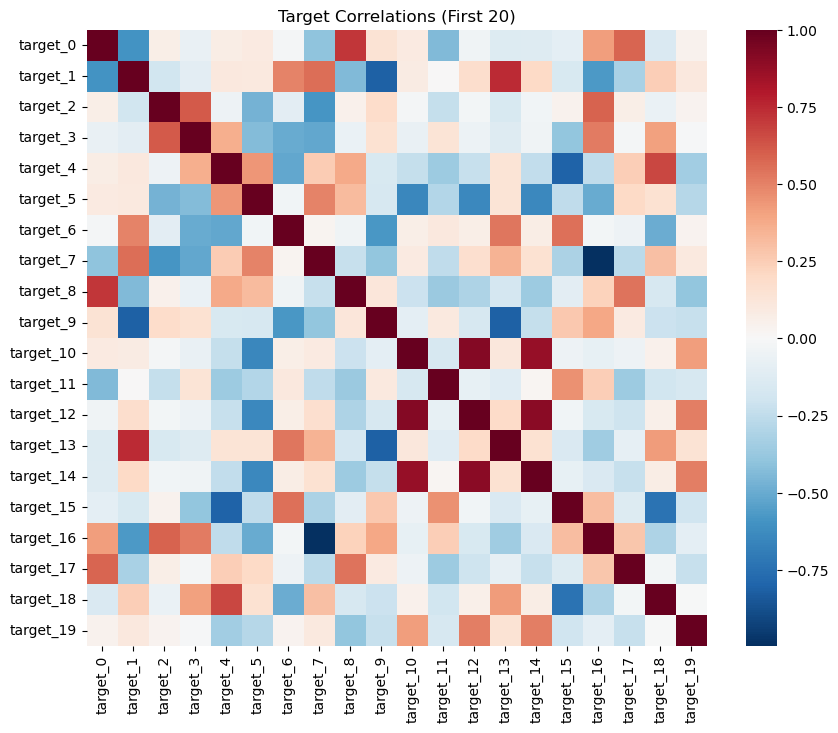

In [17]:
# Target distributions and correlations
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of a few sample targets
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sample_targets = ['target_0', 'target_1', 'target_2', 'target_3']

for i, target in enumerate(sample_targets):
    if target in merged.columns:
        row, col = i // 2, i % 2
        merged[target].dropna().hist(bins=50, ax=axes[row, col], alpha=0.7)
        axes[row, col].set_title(f'{target} Distribution')
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Target correlation heatmap (first 20 targets)
target_subset = [col for col in target_cols[:20] if col in merged.columns]
corr_matrix = merged[target_subset].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Target Correlations (First 20)')
plt.show()

Feature Group Sizes:
JPX_Futures: 40 features
LME_Metals: 4 features
US_Stocks: 475 features
FX_Pairs: 38 features

JPX_Futures Summary Stats:
       JPX_Gold_Mini_Futures_Open  JPX_Gold_Rolling-Spot_Futures_Open  \
count                 1802.000000                         1802.000000   
mean                  7502.445061                         7561.660932   
std                   2833.109824                         2890.201926   
min                   4171.000000                         4216.000000   
25%                   5189.250000                         5204.000000   
50%                   6575.000000                         6619.000000   
75%                   8857.875000                         8883.000000   
max                  15720.000000                        15984.000000   

       JPX_Gold_Standard_Futures_Open  JPX_Platinum_Mini_Futures_Open  \
count                     1802.000000                     1802.000000   
mean                      7502.554384                

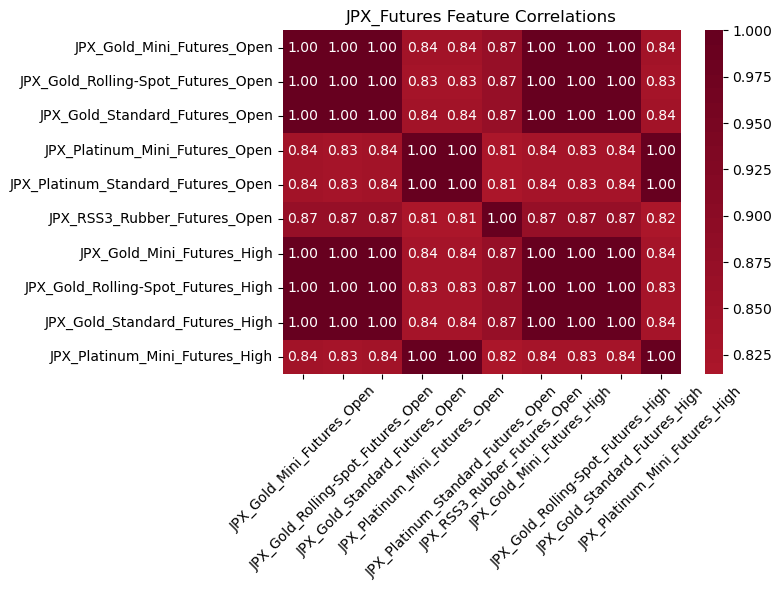


LME_Metals Correlation Matrix (first 10 features):


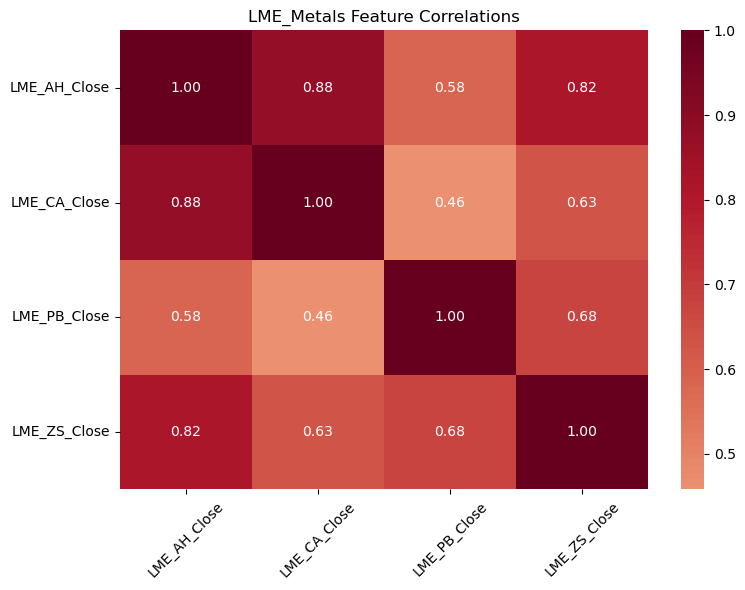


US_Stocks Correlation Matrix (first 10 features):


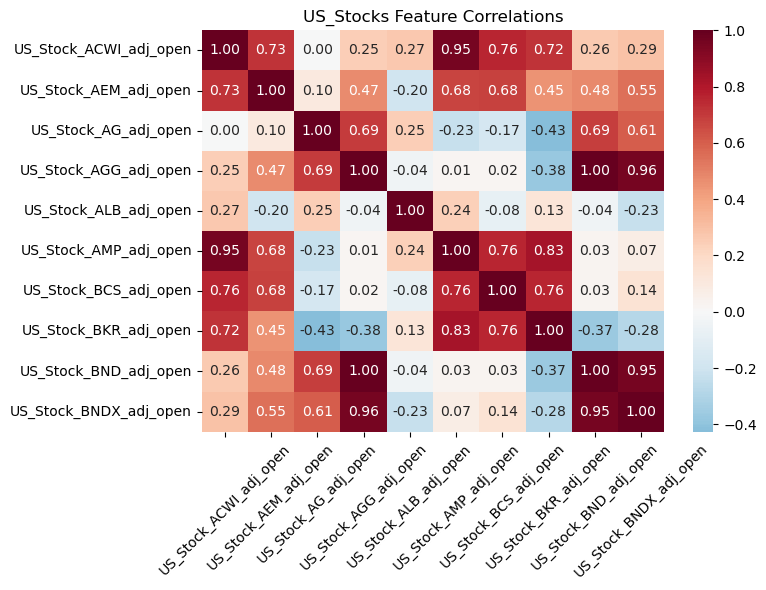


FX_Pairs Correlation Matrix (first 10 features):


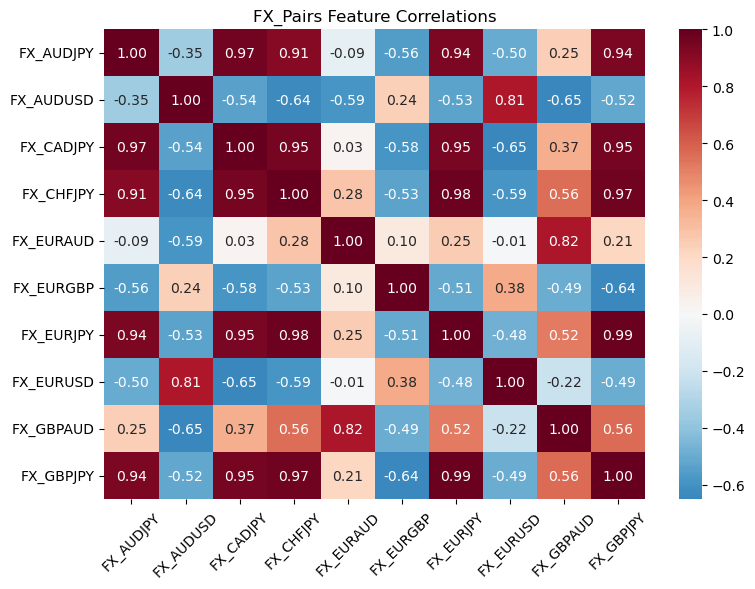

In [22]:
# Group features by type and get summary stats
feature_groups = {
    'JPX_Futures': [col for col in feature_cols if 'JPX_' in col],
    'LME_Metals': [col for col in feature_cols if 'LME_' in col],
    'US_Stocks': [col for col in feature_cols if 'US_Stock_' in col],
    'FX_Pairs': [col for col in feature_cols if 'FX_' in col]
}

print("Feature Group Sizes:")
for group_name, group_cols in feature_groups.items():
    print(f"{group_name}: {len(group_cols)} features")

# Summary stats for each group
for group_name, group_cols in feature_groups.items():
    if group_cols:
        print(f"\n{group_name} Summary Stats:")
        print(merged[group_cols].describe())

for group_name, group_cols in feature_groups.items():
    if len(group_cols) > 1:
        print(f"\n{group_name} Correlation Matrix (first 10 features):")
        subset_cols = group_cols[:10]  # Limit to avoid huge matrices
        corr_matrix = merged[subset_cols].corr()
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
        plt.title(f'{group_name} Feature Correlations')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

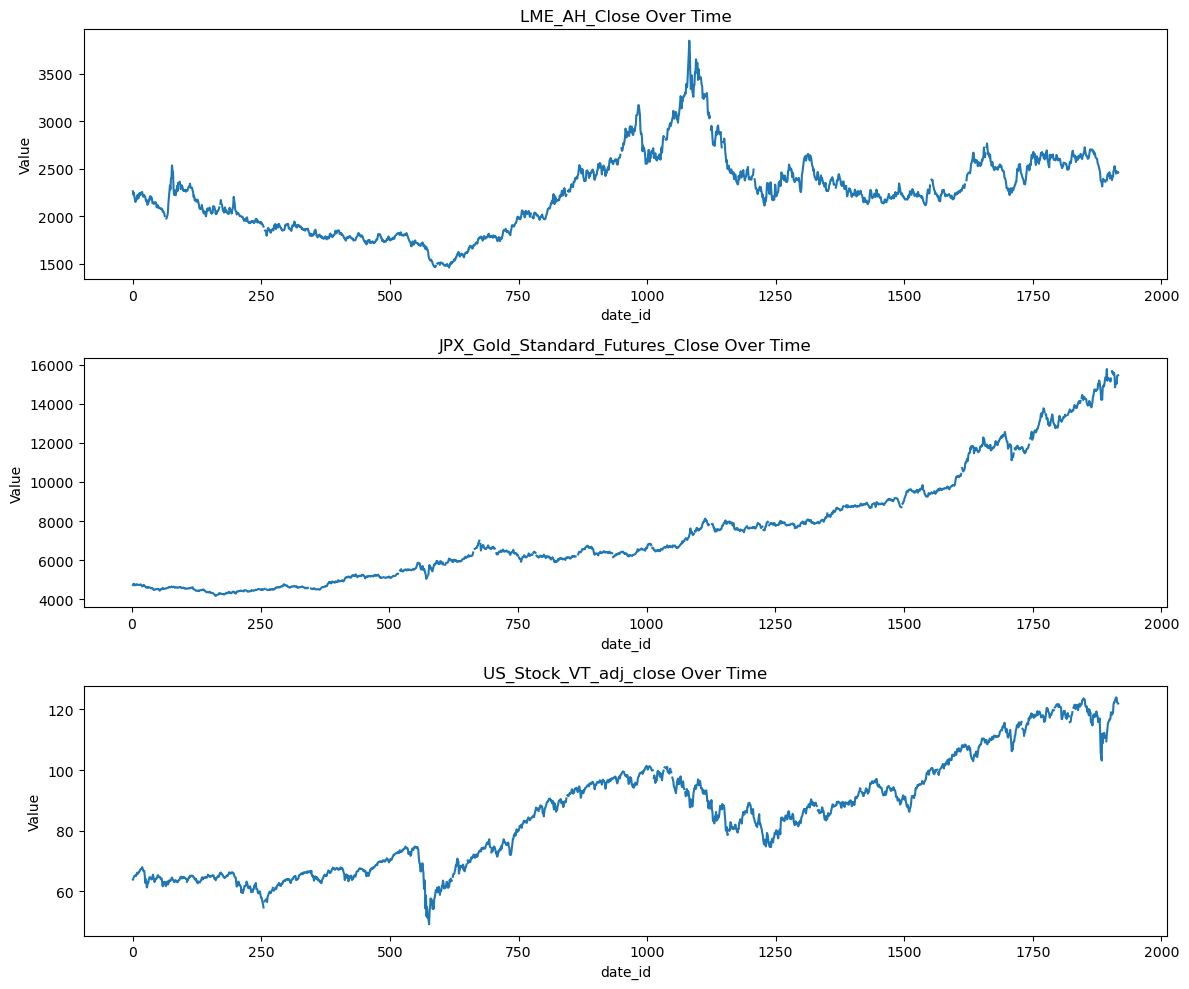

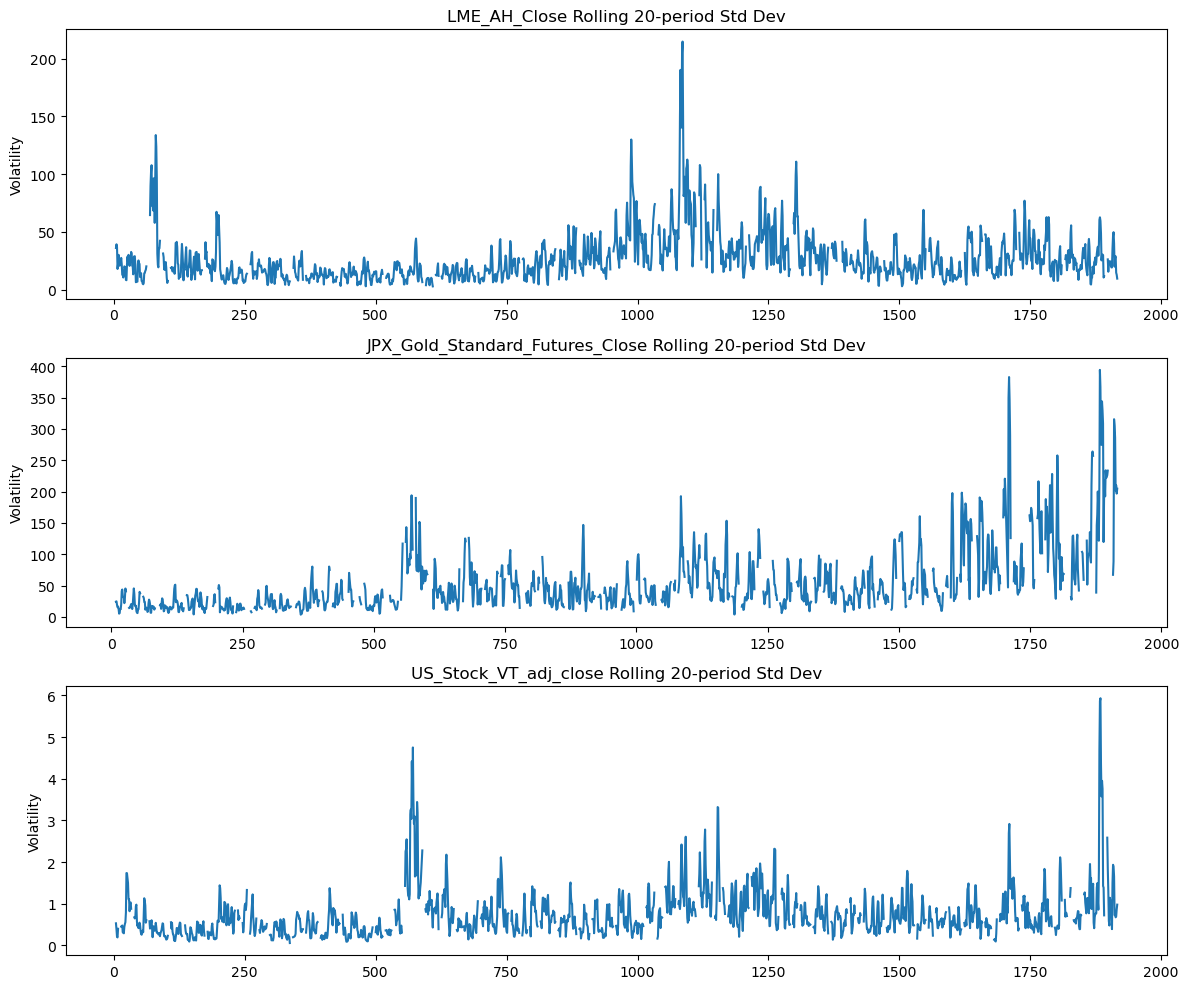

In [23]:
# Plot key features over time
key_features = ['LME_AH_Close', 'JPX_Gold_Standard_Futures_Close', 'US_Stock_VT_adj_close']

fig, axes = plt.subplots(len(key_features), 1, figsize=(12, 10))
for i, feature in enumerate(key_features):
    if feature in merged.columns:
        merged.plot(x='date_id', y=feature, ax=axes[i], legend=False)
        axes[i].set_title(f'{feature} Over Time')
        axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Volatility analysis (rolling std) - CORRECTED
fig, axes = plt.subplots(len(key_features), 1, figsize=(12, 10))
for i, feature in enumerate(key_features):
    if feature in merged.columns:
        rolling_std = merged[feature].rolling(5).std()
        axes[i].plot(merged['date_id'], rolling_std)
        axes[i].set_title(f'{feature} Rolling 20-period Std Dev')
        axes[i].set_ylabel('Volatility')

plt.tight_layout()
plt.show()

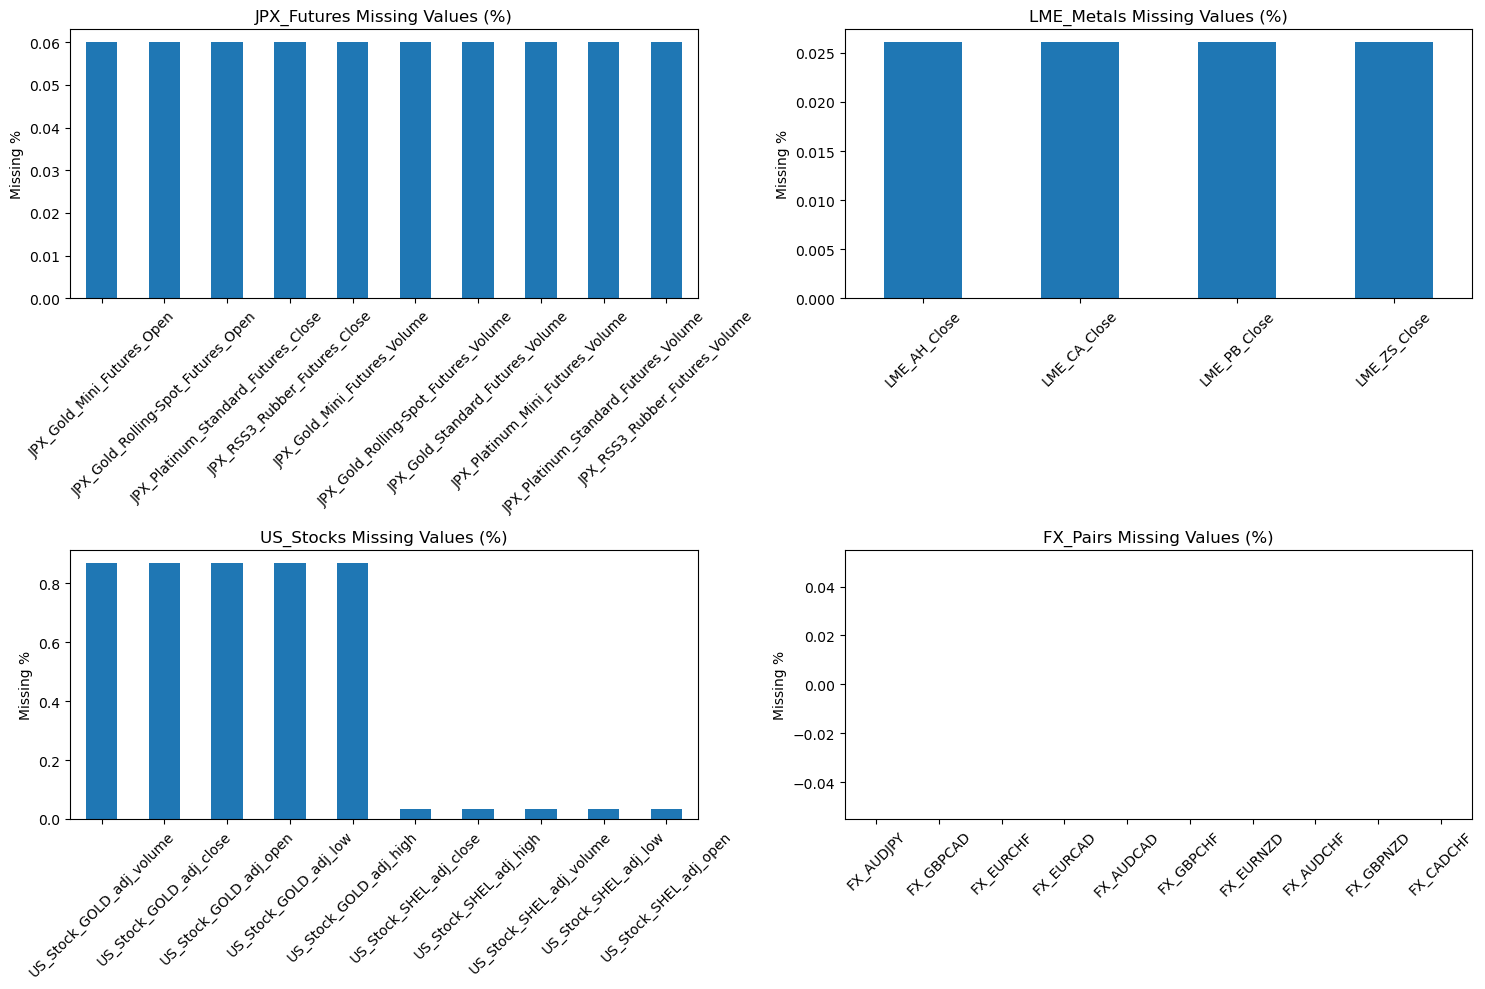

In [20]:
# Missing value patterns by group
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, (group_name, group_cols) in enumerate(feature_groups.items()):
    if group_cols:
        row, col = i // 2, i % 2
        missing_pct = merged[group_cols].isna().mean().sort_values(ascending=False)
        missing_pct.head(10).plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'{group_name} Missing Values (%)')
        axes[row, col].set_ylabel('Missing %')
        axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Identify price columns (exclude date_id and any non-price columns)
price_cols = [col for col in feature_cols if not col.endswith('_missing') and col != 'date_id']

print(f"Creating log returns for {len(price_cols)} price columns")

# Create log returns
log_returns = np.log(features[price_cols] / features[price_cols].shift(1))

# Rename columns to indicate they're returns
log_returns.columns = [f"{col}_log_return" for col in price_cols]

# Check missing values in log returns
missing_log_returns = log_returns.isna().sum().sort_values(ascending=False)
print("\nMissing values in log returns (top 20):")
print(missing_log_returns.head(20))

# Forward fill missing values (but leave high-missing features as-is)
log_returns_filled = log_returns.copy()

# Only forward fill features with reasonable missing rates (<50%)
reasonable_missing = missing_log_returns[missing_log_returns <= len(log_returns) * 0.5]
high_missing = missing_log_returns[missing_log_returns > len(log_returns) * 0.5]

print(f"\nFeatures with reasonable missing rates (<50%): {len(reasonable_missing)}")
print(f"Features with high missing rates (>50%): {len(high_missing)}")

# Forward fill only the reasonable ones
log_returns_filled[reasonable_missing.index] = log_returns_filled[reasonable_missing.index].fillna(method='ffill')

# Combine original features with log returns
features_with_returns = pd.concat([
    features.reset_index(drop=True),
    log_returns_filled.reset_index(drop=True)
], axis=1)

print(f"\nFinal features shape: {features_with_returns.shape}")
print(f"Original features: {len(feature_cols)}")
print(f"New log return features: {len(log_returns.columns)}")

# Show some examples of the new features
print("\nSample of new log return features:")
print(features_with_returns[['date_id'] + list(log_returns.columns[:5])].head())

Creating log returns for 557 price columns

Missing values in log returns (top 20):
US_Stock_GOLD_adj_low_log_return                             1680
US_Stock_GOLD_adj_volume_log_return                          1680
US_Stock_GOLD_adj_open_log_return                            1680
US_Stock_GOLD_adj_high_log_return                            1680
US_Stock_GOLD_adj_close_log_return                           1680
JPX_Gold_Rolling-Spot_Futures_Open_log_return                 207
JPX_Platinum_Mini_Futures_Close_log_return                    207
JPX_RSS3_Rubber_Futures_Close_log_return                      207
JPX_Gold_Mini_Futures_Volume_log_return                       207
JPX_Gold_Rolling-Spot_Futures_Volume_log_return               207
JPX_Gold_Standard_Futures_Volume_log_return                   207
JPX_Platinum_Mini_Futures_Volume_log_return                   207
JPX_Platinum_Standard_Futures_Volume_log_return               207
JPX_RSS3_Rubber_Futures_Volume_log_return                 

/var/folders/0v/2l8j99dx73sc54shq5t0sl_h0000gn/T/ipykernel_20375/1050806580.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  log_returns_filled[reasonable_missing.index] = log_returns_filled[reasonable_missing.index].fillna(method='ffill')
